In [1]:
import igraph as ig
import geopandas as gpd
import itertools as it

import numpy as np
from matplotlib import pyplot as plt

# Graph
<img src="/home/rico/Documents/thesis/paper/figures/sample_setup_ptn_map.png" width=400 height=400 />

In [2]:
g = ig.Graph(directed=True)

In [3]:
V_O = {f'RC{i+1}':i for i in range(6)}
V_O_attr = {
    'name': [e for e in V_O.keys()],
    'x': [3.5,2.5,3.5,0.5,0.5,1.5],
    'y': [3.5,3.5,2.5,1.5,0.5,0.5],
    'color': ['red','red','red','purple','purple','purple'],
    'type': 'res_node',
}
g.add_vertices(V_O.values(), V_O_attr)

In [4]:
V_P = {f'PT{i+1}':e for i,e in enumerate(range(6,12))}
V_P_attr = {
    'name': [e for e in V_P.keys()],
    'x': [1,2,3,3.5,3,3],
    'y': [1,2,1,3,3,3.5],
    'color': 'blue',
    'type': 'pt_node',
}
g.add_vertices(V_P.values(), V_P_attr)

In [5]:
V_D = {f'POI{i+1}':e for i,e in enumerate(range(12,15))}
V_D_attr = {
    'name': [e for e in V_D.keys()],
    'x': [2.75,2.75,3.25],
    'y': [2.75,3.25,2.75],
    'color': 'green',
    'type': 'poi_node',
}
g.add_vertices(V_D.values(), V_D_attr)

## PTN Edges

In [6]:
# Speeds
WALKING_SPEED = 5  # units per hour
BUS_SPEED = 100  # units per hour
TRAIN_SPEED = 1000  # units per hour

In [7]:
def compute_dist_from_es(es: list):
    positions = [(g.vs[e[0]]['x'], g.vs[e[0]]['y'], g.vs[e[1]]['x'], g.vs[e[1]]['y']) for e in es]
    pos_arr = np.array(positions)
    return np.sqrt((pos_arr[:,[0,2]].max(axis=1)-pos_arr[:,[0,2]].min(axis=1))**2+
                   (pos_arr[:,[1,3]].max(axis=1)-pos_arr[:,[1,3]].min(axis=1))**2)

### Walking

In [8]:
E_WALK = list(it.product(V_O.values(),V_P.values())) +\
         list(it.product(V_P.values(), V_D.values())) +\
         list(it.product(V_O.values(), V_D.values()))
distances_walk = compute_dist_from_es(E_WALK)
E_WALK_attr = {
    'distance': distances_walk,
    'tt': (distances_walk * 1/WALKING_SPEED) * 60,
    'weight': (distances_walk * 1/WALKING_SPEED) * 60,
    'color': 'gray',
    'type': 'walk',
}
g.add_edges(E_WALK, E_WALK_attr)

### PT

In [9]:
E_BUS = [
    (V_P['PT1'],V_P['PT2']),  # Bus_line_1
    (V_P['PT2'],V_P['PT1']),  # Bus_line_1
    (V_P['PT2'],V_P['PT5']),  # Bus_line_1
    (V_P['PT5'],V_P['PT2']),  # Bus_line_1
    (V_P['PT5'],V_P['PT4']),  # Bus_line_2
    (V_P['PT4'],V_P['PT5']),  # Bus_line_2
    (V_P['PT5'],V_P['PT6']),  # Bus_line_3
    (V_P['PT6'],V_P['PT5']),  # Bus_line_3
]
distances_bus = compute_dist_from_es(E_BUS)
E_BUS_attr = {
    'name': list(it.repeat(f'Bus_line_1',4)) +
            list(it.repeat(f'Bus_line_2',2)) +
            list(it.repeat(f'Bus_line_3',2)),
    'distance': distances_bus,
    'tt': (distances_bus * 1/BUS_SPEED) * 60,
    'weight': (distances_bus * 1/BUS_SPEED) * 60,
    'color': 'pink',
    'type': 'bus'
}
g.add_edges(E_BUS, E_BUS_attr)

In [10]:
distances_bus

array([1.41421356, 1.41421356, 1.41421356, 1.41421356, 0.5       ,
       0.5       , 0.5       , 0.5       ])

In [11]:
E_TRAIN = [
    (V_P['PT1'],V_P['PT5']),  # Train_line_1
    (V_P['PT5'],V_P['PT3']),  # Train_line_1
    (V_P['PT3'],V_P['PT1']),  # Train_line_1
]
distances_train = compute_dist_from_es(E_TRAIN)
E_TRAIN_attr = {
    'name': list(it.repeat(f'Train_line_1',3)),
    'distance': distances_train,
    'tt': (distances_train * 1/TRAIN_SPEED) * 60,
    'weight': (distances_train * 1/TRAIN_SPEED) * 60,
    'color': 'orange',
    'type': 'train'
}
g.add_edges(E_TRAIN, E_TRAIN_attr)

In [12]:
distances_train

array([2.82842712, 2.        , 2.        ])

In [13]:
# fig, ax = plt.subplots(figsize=(5,5))
# ig.plot(g, target='plots/synthetic_graphs/synthetic_graph_1.svg')

In [ ]:
g.es['active'] = 1

In [ ]:
len(g.es)

In [ ]:
# g.write_picklez('/home/rico/Documents/thesis/eda/notebooks/synthetic_dataset_3/graph.picklez')
# g.write_picklez('/home/rico/Documents/thesis/experiments/base_data/graph_3.picklez')

# Census Data

In [ ]:
data = {
    'neighborhood': V_O_attr['name'],
    'n_inh': [1000,1000,1000,1200,800,1000],
    'n_purple': [100, 200, 200, 1000, 600, 1000],
    'n_red': [900, 800, 800, 200, 200, 0],
    'res_centroids': gpd.points_from_xy(V_O_attr['x'], V_O_attr['y'])
}

gdf = gpd.GeoDataFrame(data, geometry='res_centroids')
gdf

In [ ]:
gdf.to_file('/home/rico/Documents/thesis/eda/notebooks/synthetic_dataset_3/census_data.geojson', driver='GeoJSON')
gdf.to_file('/home/rico/Documents/thesis/experiments/base_data/census_data_3.geojson', driver='GeoJSON')

In [ ]:
from eptnr.rewards.egalitarian import EgalitarianTheilReward
import itertools as it

census_data = gdf.copy()
census_data['geometry'] = census_data['res_centroids']
r = EgalitarianTheilReward(census_data=census_data, com_threshold=15)
r.evaluate(g)
g_prime = g.copy()

rewards = {}

n_edges = 11
possible_edges = it.combinations(g_prime.es.select(type_ne='walk', active_eq=1), n_edges)

for ps in possible_edges:
    g_prime = g.copy()
    pseudo_index = '|'.join([f"{e.source_vertex['name']}->{e.target_vertex['name']}" for e in ps])
    pes = [e.index for e in ps]
    print(pes, pseudo_index)
    for e in ps:
        g_prime.es[e.index]['active'] = 0
    rewards[pseudo_index] = r.evaluate(g_prime)

In [ ]:
rewards

In [ ]:
a = np.array(list(rewards.values()))
(a.min(), a.max())

In [ ]:
fig, ax = plt.subplots()
from eptnr.plotting.solution_plotting import plot_graph
plot_graph(ax=ax, base_graph=g, edges=[81])

In [ ]:
import matplotlib.pyplot as plt

from eptnr.analysis.full_problem_exploration import full_problem_exploration
from eptnr.plotting.solution_plotting import plot_full_problem_exploration

edge_types = list(np.unique(g.es['type']))
edge_types.remove('walk')

g.es[72,73,74,75,76,78,81,82]['active'] = 0
configurations, rewards = full_problem_exploration(g=g, reward=r, edge_types=edge_types)
fig, axs = plot_full_problem_exploration(base_graph=g, configurations=configurations, rewards=rewards)
plt.show()

fig.savefig(f'/home/rico/Documents/thesis/paper/'
            f'overleaf/62a466789b2183065a639cda/content-media/'
            f'all_configurations_ds_3_egalitarian_BASE.svg')

In [ ]:
fig, ax = plt.subplots()
from eptnr.plotting.solution_plotting import plot_graph
plot_graph(ax=ax, base_graph=g, edges=[81])

In [ ]:
import matplotlib.pyplot as plt

from eptnr.analysis.full_problem_exploration import full_problem_exploration
from eptnr.plotting.solution_plotting import plot_full_problem_exploration

edge_types = list(np.unique(g.es['type']))
edge_types.remove('walk')

g.es[72,73,74,75,76,78,81,82]['active'] = 0
configurations, rewards = full_problem_exploration(g=g, reward=r, edge_types=edge_types)
fig, axs = plot_full_problem_exploration(base_graph=g, configurations=configurations, rewards=rewards)
plt.show()

fig.savefig(f'/home/rico/Documents/thesis/paper/'
            f'overleaf/62a466789b2183065a639cda/content-media/'
            f'all_configurations_ds_3_egalitarian_BASE.svg')

In [ ]:
g.es[72,73,74,75,76,78,81,82]['active']

INFO:/home/rico/Documents/thesis/ptnrue_package/ptnrue/analysis/full_problem_exploration.py:Possible states: [[[]], [[77], [79], [80]], [[77, 79], [77, 80], [79, 80]], [[77, 79, 80]], [], [], [], [], [], [], []]
  0%|          | 0/11 [00:00<?, ?it/s]INFO:/home/rico/Documents/thesis/ptnrue_package/ptnrue/analysis/full_problem_exploration.py:For state [] obtained rewards [73.17342999823114]
INFO:/home/rico/Documents/thesis/ptnrue_package/ptnrue/analysis/full_problem_exploration.py:For state [77] obtained rewards [64.13737292504594, -inf, -inf]
INFO:/home/rico/Documents/thesis/ptnrue_package/ptnrue/analysis/full_problem_exploration.py:For state [79] obtained rewards [64.13737292504594, 64.13737292504581, -inf]
INFO:/home/rico/Documents/thesis/ptnrue_package/ptnrue/analysis/full_problem_exploration.py:For state [80] obtained rewards [64.13737292504594, 64.13737292504581, 0.9646541141649883]
 18%|█▊        | 2/11 [00:00<00:00, 10.70it/s]INFO:/home/rico/Documents/thesis/ptnrue_package/ptnrue

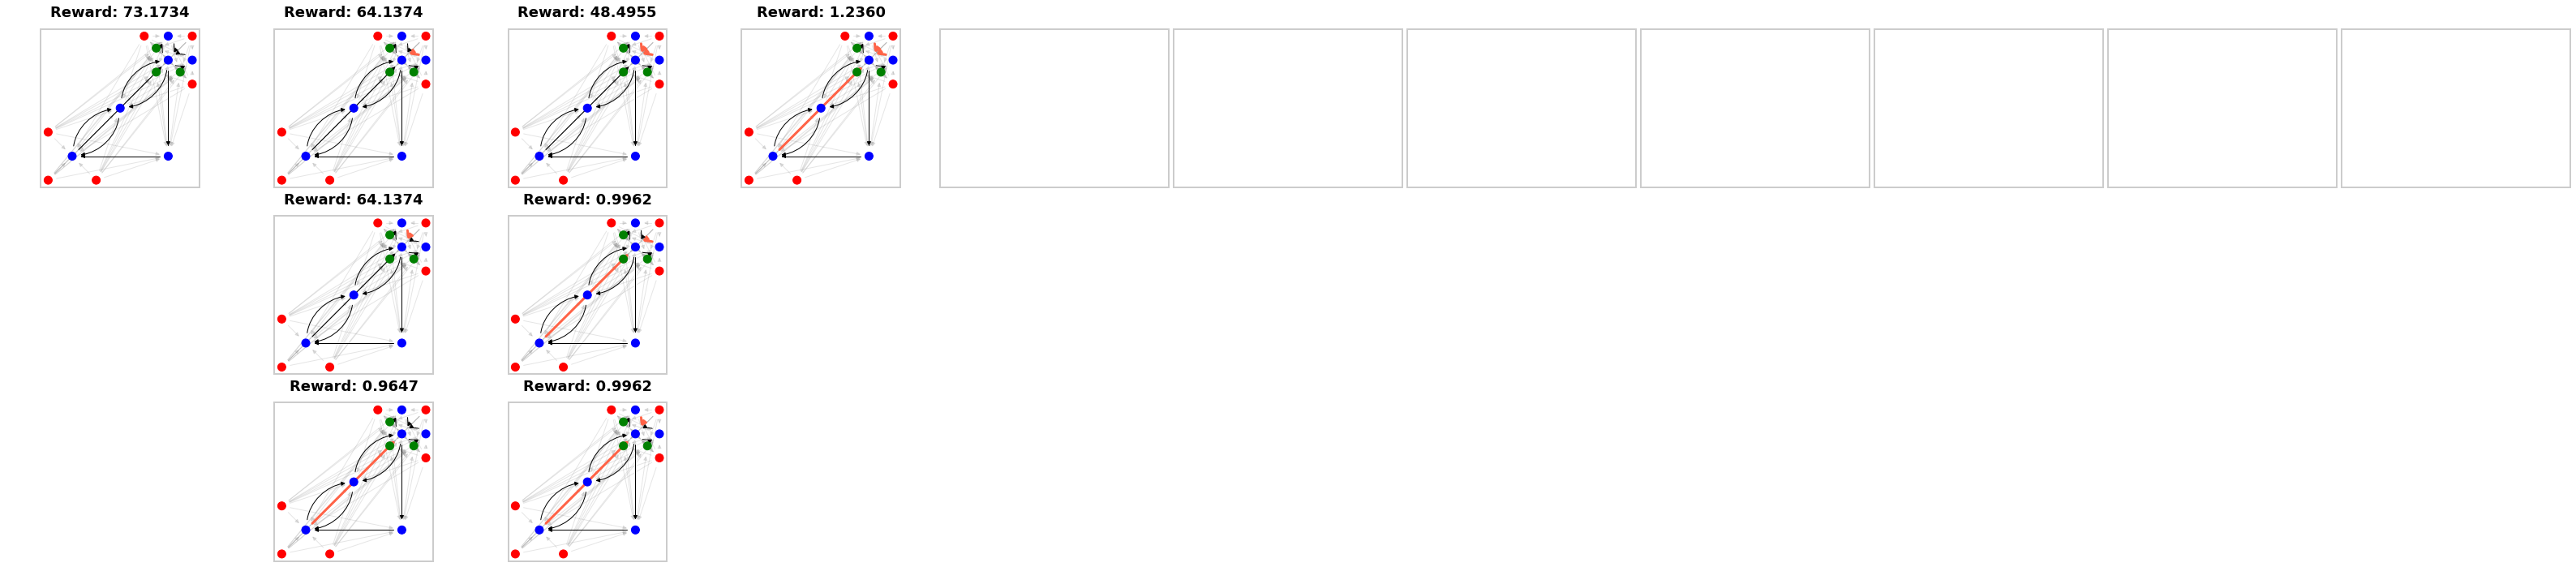

In [33]:
import matplotlib.pyplot as plt

from eptnr.analysis.full_problem_exploration import full_problem_exploration
from eptnr.plotting.solution_plotting import plot_full_problem_exploration

edge_types = list(np.unique(g.es['type']))
edge_types.remove('walk')

g.es[72,73,74,75,76,78,81,82]['active'] = 0
configurations, rewards = full_problem_exploration(g=g, reward=r, edge_types=edge_types)
fig, axs = plot_full_problem_exploration(base_graph=g, configurations=configurations, rewards=rewards)
plt.show()

fig.savefig(f'/home/rico/Documents/thesis/paper/'
            f'overleaf/62a466789b2183065a639cda/content-media/'
            f'all_configurations_ds_3_egalitarian_BASE.svg')

In [31]:
g.es[72,73,74,75,76,78,81,82]['active']

[0, 0, 0, 0, 0, 0, 0, 0]